In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy import optimize

In [2]:
alpha_count = np.fromstring(
"""0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 14 2 1 0 1 1 0 12 4 5 6 13 2 7 1 34
0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 2 0 1 0 3 0 6 4 2 1 4 3 2 2 5
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 2 2 4 2 3 3 8 1 5 1 3 2 2 3 7
0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 6 4 2 1 2 1 2 1 8 0 1 0 2 2 1 1 7
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 5 6 2 3 4 2 7 4 10 4 3 1 9 1 0 0 1
0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 8 4 4 8 4 7 10 6 17 2 2 5 6 2 1 5 9
1 0 0 0 0 0 0 0 0 1 0 0 2 1 1 2 7 13 16 11 12 8 17 6 15 6 5 1 8 0 4 1 7
0 0 0 0 0 0 0 0 0 0 0 4 1 1 1 2 11 24 20 35 45 48 51 21 30 13 2 2 9 1 1 2 3
1 0 0 0 0 0 1 1 0 2 0 8 5 7 8 14 18 240 116 100 133 122 135 48 119 12 23 4 9 5 5 2 17
0 0 0 0 0 3 0 1 0 2 4 7 14 12 12 11 33 240 143 137 174 160 143 93 46 3 10 4 8 2 1 0 8
1 1 0 1 1 2 2 1 5 5 10 25 33 38 47 98 59 593 423 339 428 230 233 67 63 19 9 3 13 3 6 5 19
0 1 0 1 2 2 6 1 6 22 76 178 260 248 424 873 876 3835 2401 2013 1668 970 478 171 265 47 53 28 67 14 18 32 106
1 0 2 1 2 3 6 6 15 30 67 536 867 1373 3073 7045 9445 27261 14668 9232 7296 2727 1951 719 1002 212 235 138 319 77 114 90 527
0 0 1 1 3 3 3 2 24 39 124 646 1077 2294 6504 18329 74268 49042 26360 13216 5581 2044 1252 559 778 162 175 104 213 46 72 56 257
1 1 0 0 3 2 5 8 33 54 166 1024 1809 3535 10117 34966 254535 159126 67330 16439 6990 2336 1813 593 1026 208 248 138 291 45 93 53 276
0 1 1 1 3 1 5 7 37 72 285 1513 2970 5573 15503 56406 486902 275785 47329 10296 4509 1543 995 356 877 127 182 96 276 22 32 27 176
1 0 0 3 3 3 9 6 15 29 112 916 1937 9047 39058 114909 0 20477 3649 631 188 80 43 31 6 3 4 1 3 0 2 3 2
20 5 3 2 8 15 22 31 147 176 627 5136 13687 20239 70672 171352 45173 6574 2179 827 316 159 67 25 22 13 11 14 23 10 23 23 19
6 2 4 1 3 13 14 32 112 150 451 2900 6281 9770 35654 39810 9897 2907 998 331 188 120 63 28 28 12 5 3 7 3 3 3 11
3 3 1 8 10 13 13 30 78 118 254 1414 2907 5624 10759 9032 1934 1300 434 148 79 59 28 18 10 2 3 4 4 4 2 4 5
7 3 4 6 6 15 9 22 65 108 214 1146 2765 2820 4492 3206 571 601 214 73 48 24 13 9 4 3 3 1 4 0 2 6 2
8 5 3 4 2 4 6 12 54 66 135 711 1082 1081 1296 871 168 356 103 26 18 23 15 9 6 1 3 2 4 1 2 3 0
14 0 3 3 2 7 11 13 35 46 137 546 836 553 734 518 68 139 60 18 19 7 15 12 4 1 0 2 2 1 0 1 0
4 0 6 3 0 5 6 6 25 24 38 256 306 218 212 164 40 76 18 6 6 6 7 3 2 0 4 2 2 0 0 1 1
9 8 4 5 6 8 12 12 55 36 58 347 491 252 338 307 8 67 21 8 5 8 4 4 10 1 3 3 6 2 1 0 3
4 1 3 3 2 0 3 6 6 6 15 87 91 49 47 40 4 28 13 10 7 6 5 4 1 1 0 1 2 0 0 2 1
7 3 5 4 5 1 6 5 16 11 16 94 89 42 50 42 3 28 10 3 2 3 1 2 2 0 0 0 2 1 1 0 1
3 1 1 4 2 3 1 1 6 3 10 75 62 24 32 14 1 21 10 3 7 2 1 3 2 2 0 1 3 0 0 0 1
8 6 7 3 4 4 3 9 21 12 27 83 113 55 87 79 1 24 14 3 8 4 2 7 2 1 1 0 3 0 0 2 1
2 0 2 2 1 1 1 1 5 4 4 17 19 8 11 4 0 5 6 0 1 1 1 0 0 1 1 0 0 0 0 0 0
3 2 2 0 1 1 4 2 4 2 1 23 28 13 20 11 0 12 10 3 4 4 3 0 2 1 2 1 0 0 1 1 1
3 3 0 0 2 0 1 1 0 4 1 21 22 8 20 12 1 13 12 4 2 3 4 4 4 0 4 1 4 0 0 0 1
25 6 8 8 5 5 6 2 15 11 11 79 128 61 105 151 2 22 24 12 3 13 7 5 7 3 3 0 0 0 0 0 1""",
sep=' ', dtype=int).reshape((33,33))

(0.88179515291816746, 0.0)

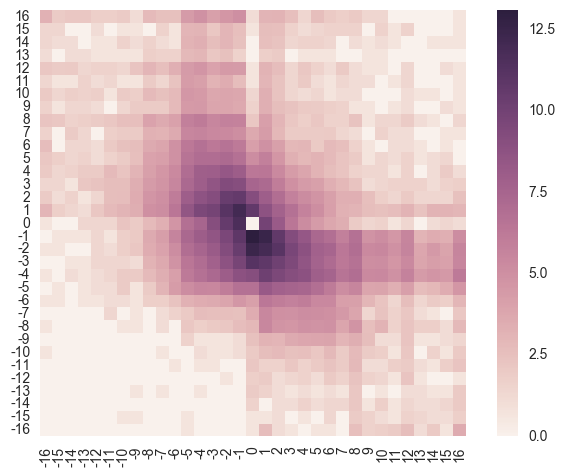

In [3]:
log1p_counts = pd.DataFrame(np.log1p(alpha_count), index=range(-16, 17), columns=range(-16, 17))
sns.heatmap(log1p_counts[::-1], square=True);
alpha_symm = (alpha_count + alpha_count.T) * .5
stats.pearsonr(alpha_count.ravel(), alpha_symm.ravel())

In [4]:
alpha_norm = alpha_count.astype(float)
alpha_norm[:16,:16] /= alpha_norm[:16,:16].sum()
alpha_norm[17:,:16] /= alpha_norm[17:,:16].sum()
alpha_norm[:16,17:] /= alpha_norm[:16,17:].sum()
alpha_norm[17:,17:] /= alpha_norm[17:,17:].sum()
alpha_norm[:16,16] /= alpha_norm[:16,16].sum()
alpha_norm[17:,16] /= alpha_norm[17:,16].sum()
alpha_norm[16,:16] /= alpha_norm[16,:16].sum()
alpha_norm[16,17:] /= alpha_norm[16,17:].sum()
alpha_norm *= alpha_count.sum()

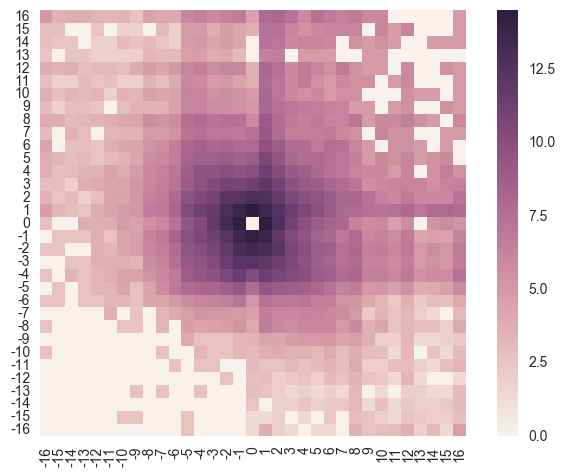

In [5]:
log1p_norm = pd.DataFrame(np.log1p(alpha_norm), index=range(-16, 17), columns=range(-16, 17))
sns.heatmap(log1p_norm[::-1], square=True);

(0.99626808196755279, 0.0)

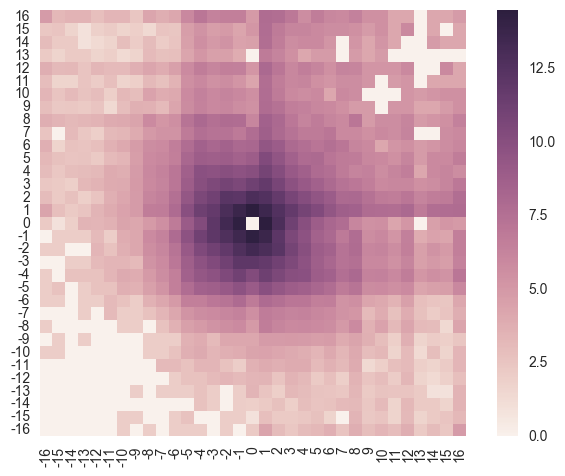

In [6]:
alpha_norm_symm = (alpha_norm + alpha_norm.T) * .5
log1p_norm_symm = pd.DataFrame(np.log1p(alpha_norm_symm), index=range(-16, 17), columns=range(-16, 17))
sns.heatmap(log1p_norm_symm[::-1], square=True);
stats.pearsonr(alpha_norm.ravel(), alpha_norm_symm.ravel())

(0.99918433042765409, 0.0)

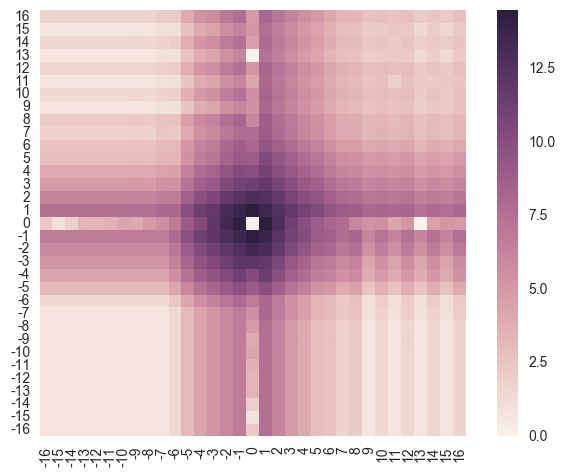

In [7]:
ones_16x16 = np.ones((16, 16))
t = alpha_norm_symm.copy()
for quadrant in [t[:16, :16], t[17:, :16], t[:16, 17:], t[17:, 17:]]:
    def cost_t(x):
        x = x.clip(1)
        v = (x[:16] * ones_16x16).T * x[16:]
        return ((quadrant - v)**2).sum()
    x0 = np.hstack((quadrant.mean(axis=1), quadrant.mean(axis=0)))
    x0 *= np.sqrt(quadrant.sum() / ((x0[:16] * ones_16x16).T * x0[16:]).sum())
    x0 = optimize.fmin(cost_t, x0, maxfun=100000, disp=False).clip(1)
    quadrant[:, :] = (x0[:16] * ones_16x16).T * x0[16:]
alpha_norm_symm_1d = (t + t.T) * .5
log1p_1d = pd.DataFrame(np.log1p(alpha_norm_symm_1d), index=range(-16, 17), columns=range(-16, 17))
sns.heatmap(log1p_1d[::-1], square=True)
stats.pearsonr(alpha_norm_symm.ravel(), alpha_norm_symm_1d.ravel())

In [8]:
alpha_model = alpha_norm_symm_1d.copy()
alpha_model[:16,:16] *= alpha_count[:16,:16].sum() / alpha_norm[:16,:16].sum()
alpha_model[17:,:16] *= alpha_count[17:,:16].sum() / alpha_norm[17:,:16].sum()
alpha_model[:16,17:] *= alpha_count[:16,17:].sum() / alpha_norm[:16,17:].sum()
alpha_model[17:,17:] *= alpha_count[17:,17:].sum() / alpha_norm[17:,17:].sum()
alpha_model[:16,16] *= alpha_count[:16,16].sum() / alpha_norm[:16,16].sum()
alpha_model[17:,16] *= alpha_count[17:,16].sum() / alpha_norm[17:,16].sum()
alpha_model[16,:16] *= alpha_count[16,:16].sum() / alpha_norm[16,:16].sum()
alpha_model[16,17:] *= alpha_count[16,17:].sum() / alpha_norm[16,17:].sum()

(0.99384410957992408, 0.0)

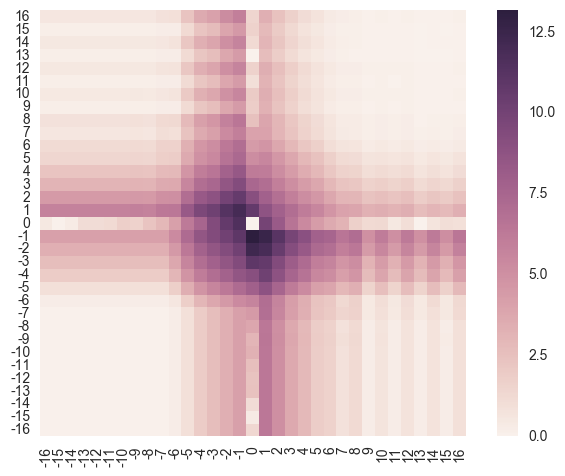

In [9]:
log1p_model = pd.DataFrame(np.log1p(alpha_model), index=range(-16, 17), columns=range(-16, 17))
sns.heatmap(log1p_model[::-1], square=True);
stats.pearsonr(alpha_count.ravel(), alpha_model.ravel())

In [10]:
np.sum(alpha_count*-np.log2(alpha_count.clip(1)/alpha_count.sum()))

11842526.745033456

In [11]:
np.sum(alpha_count*-np.log2(alpha_model.clip(1)/alpha_model.sum()))

12067801.701020081